In [1]:
from phenoseeker import EmbeddingManager
from pathlib import Path
embeddings_npy = Path("/projects/synsight/data/jump_embeddings/wells_embeddings/openphenom/embeddings_openphenom_test_3_plates.npy")
Metadata_parquet = Path("/projects/synsight/data/jump_embeddings/wells_embeddings/openphenom/metadata_openphenom_test_3_plates.parquet")

In [2]:
em = EmbeddingManager(Metadata_parquet, entity="well")

In [3]:
em.load('Embeddings_mean', embeddings_npy)

# Done

In [10]:


output_folder = Path("./tmp/test")
output_folder.mkdir(exist_ok=True)
em.save_to_folder(folder_path=output_folder, embeddings_name="all")

print(f"Metadata and embeddings saved to {output_folder}")


In [8]:

# 2. Test Grouping Embeddings by 'Metadata_Well' or 'Metadata_InChI'
grouped_em_by_well = em.grouped_embeddings(
    group_by="compound",
    embeddings_name="Embeddings_mean",
    aggregation="mean"
)
print(f"Grouped embeddings by well. New instance created with {len(grouped_em_by_well.df)} rows.")


Grouped embeddings by well. New instance created with 968 rows.


In [9]:

# 2. Test Grouping Embeddings by 'Metadata_Well' or 'Metadata_InChI'
grouped_em_by_well = em.grouped_embeddings(
    group_by="compound",
    embeddings_name="Embeddings_mean",
    aggregation="median"
)
print(f"Grouped embeddings by well. New instance created with {len(grouped_em_by_well.df)} rows.")


Grouped embeddings by well. New instance created with 968 rows.


In [9]:

# 3. Test Applying Rescale
em.apply_rescale(
    embeddings_name="Embeddings_mean",
    new_embeddings_name="Embeddings_rescddaled",
    scale="0-1",
    n_jobs=1
)
print("Rescaling applied to 'Embeddings_mean'. Stored as 'Embeddings_rescaled'.")


Rescaling features by plates: 100%|██████████| 3/3 [00:00<00:00, 535.19it/s]

Rescaling applied to 'Embeddings_mean'. Stored as 'Embeddings_rescaled'.


In [10]:

# 4. Test Applying Inverse Normal Transform
em.apply_inverse_normal_transform(
    embeddings_name="Embeddings_mean",
    new_embeddings_name="Embeddings_INT",
    n_jobs=1
)
print("Inverse normal transformation applied to 'Embeddings_mean'. Stored as 'Embeddings_INT'.")


Applying INT by plate: 100%|██████████| 3/3 [00:00<00:00,  6.77it/s]

Inverse normal transformation applied to 'Embeddings_mean'. Stored as 'Embeddings_INT'.


Computing matrices...
Embeddings shape: (96, 384)
Plotting matrices of size 96x96...


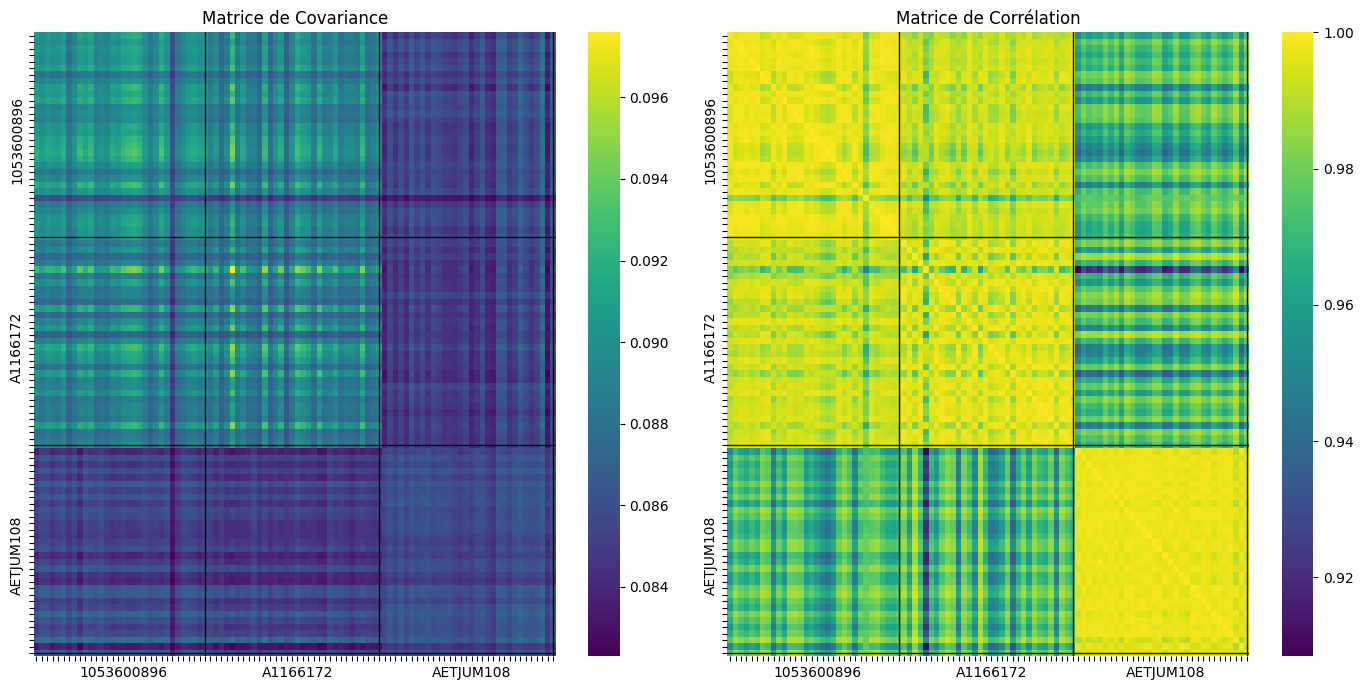

Covariance and correlation matrices plotted.


In [29]:

# 5. Test Covariance and Correlation Calculation and Plotting
em.plot_covariance_and_correlation(
    embeddings_name="Embeddings_mean",
    by_sample=True,
    use_dmso=True,
    dmso_only=True,
    sort_by='Metadata_Plate'
)
print("Covariance and correlation matrices plotted.")


In [31]:

# 6. Test Computing Distance Matrix
em.compute_distance_matrix(
    embedding_name="Embeddings_mean",
    distance="cosine",
    n_jobs=2    
)
print("Cosine distance matrix computed for 'Embeddings_mean'.")


Cosine distance matrix computed for 'Embeddings_mean'.


Calculating ideal mixing LISI scores for Embeddings_mean: 100%|██████████| 3/3 [00:10<00:00,  3.54s/it]
Calculating LISI scores for Embeddings_mean: 100%|██████████| 3/3 [00:03<00:00,  1.19s/it]


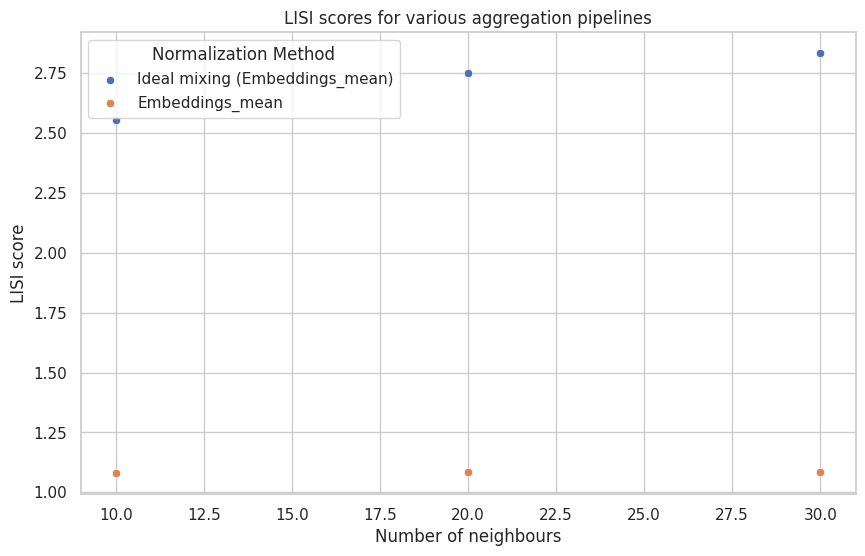

LISI scores computed:
    Ideal mixing (Embeddings_mean)  Embeddings_mean
10                        2.554050         1.079752
20                        2.752134         1.083770
30                        2.832991         1.086098


In [35]:

# 7. Test LISI Score Computation
lisi_scores = em.compute_lisi(
    labels_column="Metadata_Source",
    embeddings_names=["Embeddings_mean"],
    n_neighbors_list=[10, 20, 30],
    plot=True
)
print("LISI scores computed:")
print(lisi_scores)


In [37]:

# 8. Test Feature Distribution Testing
feature_distribution_test = em.test_feature_distributions(
    embedding_name="Embeddings_mean",
    continuous_distributions=["norm", "lognorm"]
)
print("Feature distribution testing results:")
print(feature_distribution_test)


Testing features on classical distributions: 100%|██████████| 384/384 [01:48<00:00,  3.52it/s]


Feature distribution testing results:
             norm_p_value follows_norm  lognorm_p_value follows_lognorm
Feature_0    6.416246e-01         True     6.664512e-01            True
Feature_1    7.946174e-01         True     7.220806e-01            True
Feature_2    1.553312e-01         True     2.518885e-01            True
Feature_3    4.884696e-12        False     2.846172e-12           False
Feature_4    1.025217e-02        False     2.665279e-02           False
...                   ...          ...              ...             ...
Feature_379  3.852560e-08        False     4.020744e-05           False
Feature_380  1.096737e-14        False     2.803312e-21           False
Feature_381  4.547337e-13        False     1.509534e-03           False
Feature_382  7.410918e-15        False     9.351913e-15           False
Feature_383  4.016449e-33        False     1.362990e-32           False

[384 rows x 4 columns]


In [15]:
em.apply_median_polish("Embeddings_mean", n_jobs=2)

100%|██████████| 3/3 [00:19<00:00,  6.34s/it][00:00<?, ?it/s]


In [4]:

# 9. Test Spherizing
em.apply_spherizing_transform(
    embeddings_name="Embeddings_mean",
    new_embeddings_name="Embeddings_spherized",
    method="ZCA",
    norm_embeddings=True,
    use_control=True,
    n_jobs=2,
)
print("Spherizing applied to 'Embeddings_mean'. Stored as 'Embeddings_spherized'.")


Normalizing plates with Spherize transformation:   0%|          | 0/3 [00:00<?, ?it/s]

Normalizing plates with Spherize transformation: 100%|██████████| 3/3 [00:00<00:00, 11.61it/s]


Spherizing applied to 'Embeddings_mean'. Stored as 'Embeddings_spherized'.


In [5]:

# 10. Test Filtering and Instantiating
filtered_em = em.filter_and_instantiate(Metadata_Source=["Source_1", "Source_2"])
print(f"Filtered instance created with {len(filtered_em.df)} rows.")


Filtered instance created with 0 rows.


In [8]:

# 11. Test Removing Features
em.remove_features(
    embedding_name="Embeddings_mean",
    threshold=0.01,
    metrics="iqrs"
)
print("Features with low variance removed from 'Embeddings_mean'.")


Processing plates: 100%|██████████| 3/3 [00:00<00:00, 510.73it/s]

Number of features removed: 0
Features with low variance removed from 'Embeddings_mean'.


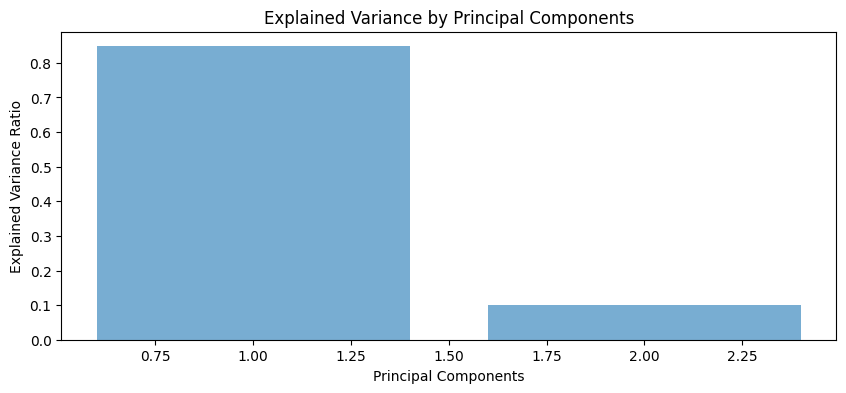

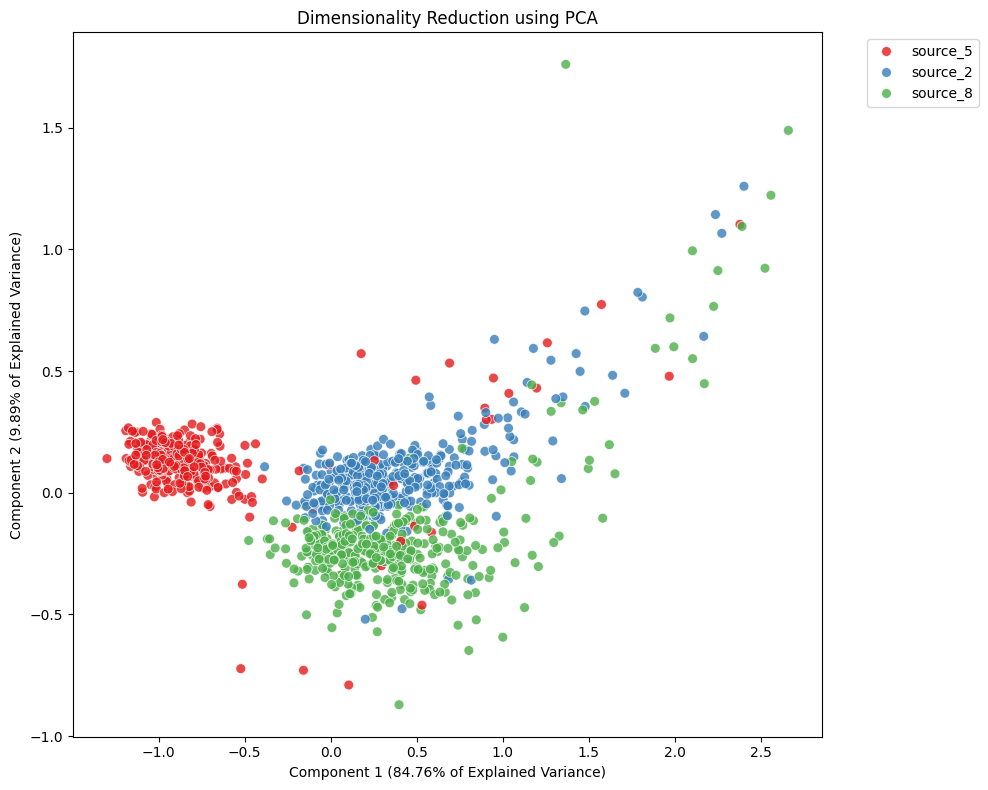

PCA dimensionality reduction performed and plotted.


In [9]:

# 12. Test Dimensionality Reduction and Plotting
em.plot_dimensionality_reduction(
    embedding_name="Embeddings_mean",
    reduction_method="PCA",
    color_by="Metadata_Source",
    n_components=2
)
print("PCA dimensionality reduction performed and plotted.")


# To do

In [16]:
em.embeddings.keys()

dict_keys(['Embeddings_mean', 'Embeddings_spherized', 'Embeddings_MedianPolish'])

Calculating mAP for Embeddings_MedianPolish: 100%|██████████| 3/3 [00:00<00:00, 1152.70it/s]


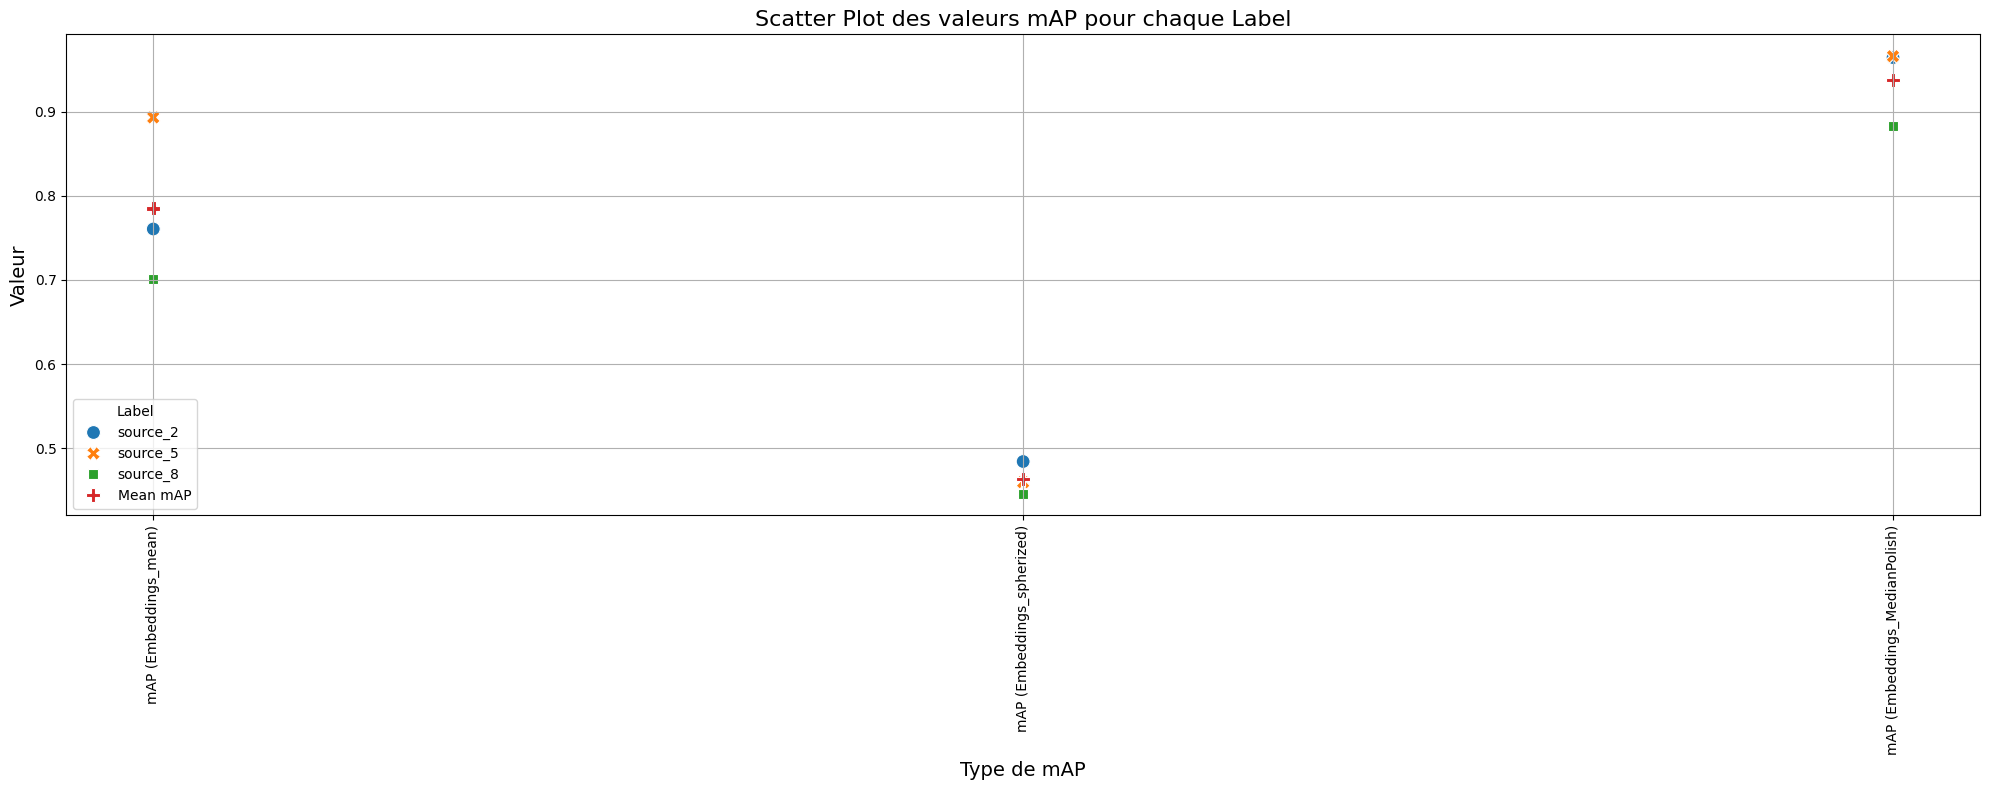

Mean Average Precision (MAP) computed:


,Label,Number of Queries,mAP (Embeddings_mean),mAP (Embeddings_spherized),mAP (Embeddings_MedianPolish)
0,source_2,383.000000,0.760563,0.484456,0.964110
1,source_5,384.000000,0.893015,0.459899,0.965737
2,source_8,384.000000,0.701378,0.446349,0.883014
3,Mean mAP,383.666667,0.784986,0.463568,0.937620


In [19]:

# 13. Test Compute Maps
maps = em.compute_maps(
    labels_column="Metadata_Source",
    embeddings_names=['Embeddings_mean', 'Embeddings_spherized', 'Embeddings_MedianPolish'],
    distance="cosine",
    plot=True,
    random_maps=False,
    n_jobs=3
)
print("Mean Average Precision (MAP) computed:")

maps


Calculating mAP for Embeddings_MedianPolish: 100%|██████████| 968/968 [00:00<00:00, 2693.18it/s]


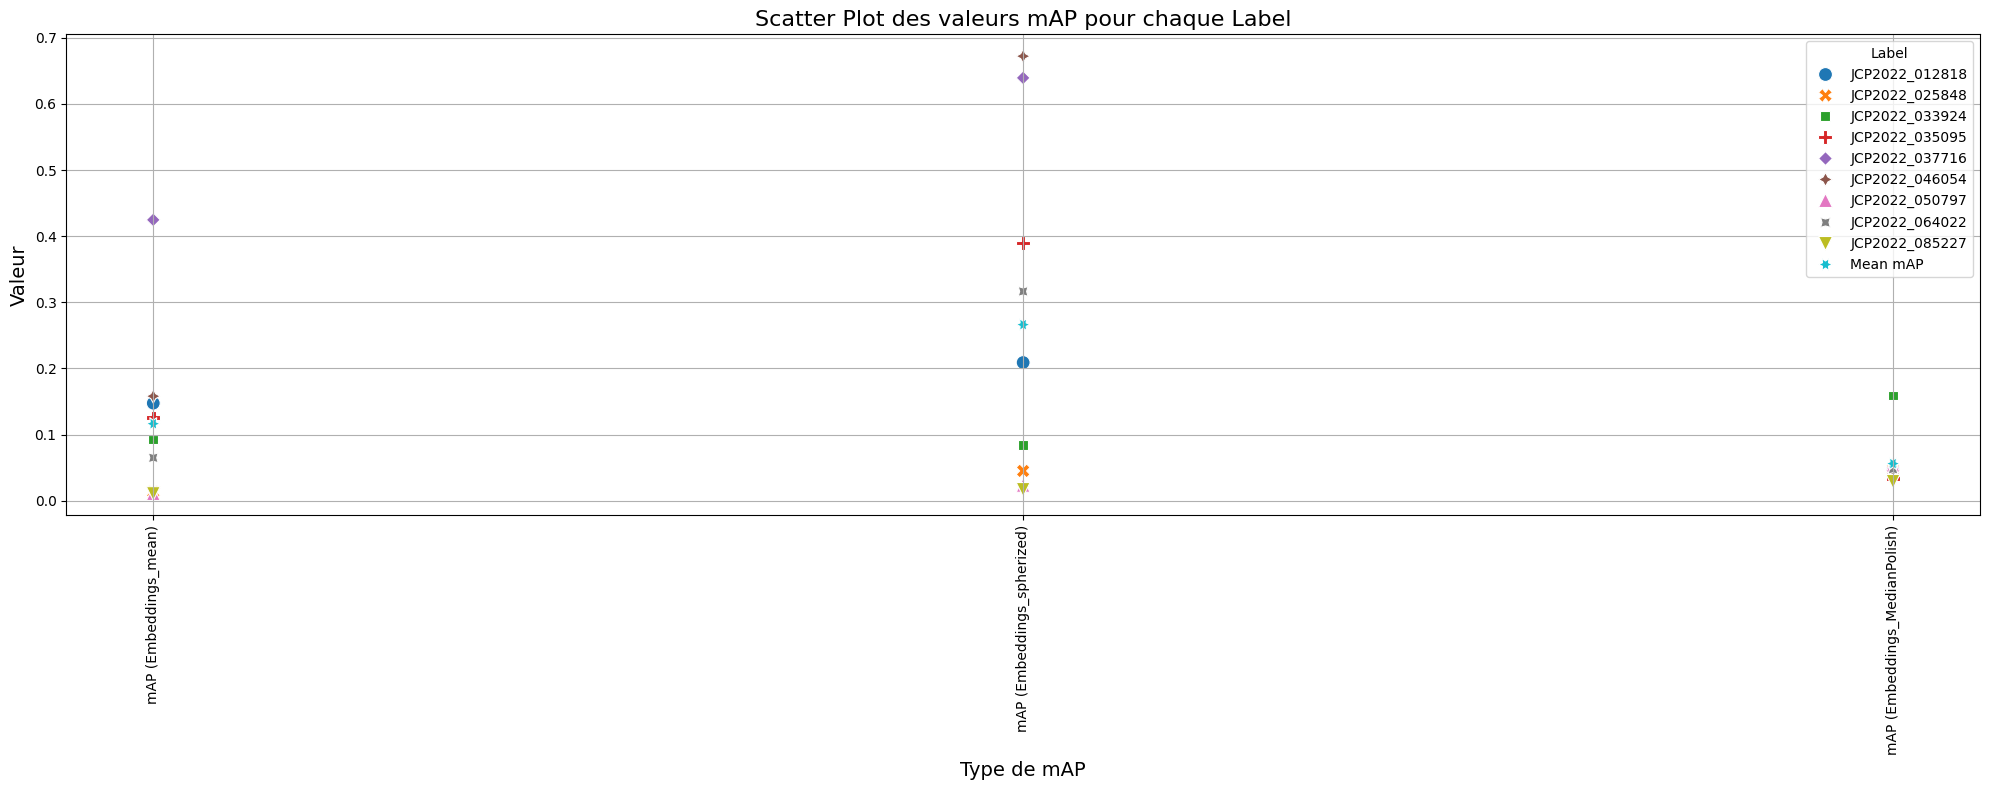

Mean Average Precision (MAP) computed:


,Label,Number of Queries,mAP (Embeddings_mean),mAP (Embeddings_spherized),mAP (Embeddings_MedianPolish)
0,JCP2022_012818,12.000000,0.147468,0.208889,0.044662
1,JCP2022_025848,12.000000,0.013272,0.044949,0.046606
2,JCP2022_033924,96.000000,0.092498,0.084121,0.159042
3,JCP2022_035095,12.000000,0.125442,0.389946,0.033869
4,JCP2022_037716,12.000000,0.424696,0.639453,0.048730
5,JCP2022_046054,12.000000,0.157973,0.672223,0.041172
6,JCP2022_050797,12.000000,0.010727,0.023149,0.053732
7,JCP2022_064022,12.000000,0.064819,0.316429,0.047517
8,JCP2022_085227,12.000000,0.010661,0.016886,0.029052
9,Mean mAP,21.333333,0.116395,0.266227,0.056042


In [21]:

# 13. Test Compute Maps
maps = em.compute_maps(
    labels_column="Metadata_JCP2022",
    embeddings_names=['Embeddings_mean', 'Embeddings_spherized', 'Embeddings_MedianPolish'],
    distance="cosine",
    plot=True,
    random_maps=False,
    n_jobs=3
)
print("Mean Average Precision (MAP) computed:")

maps


Calculating mAP for Embeddings_mean: 100%|██████████| 3/3 [00:00<00:00, 936.58it/s]


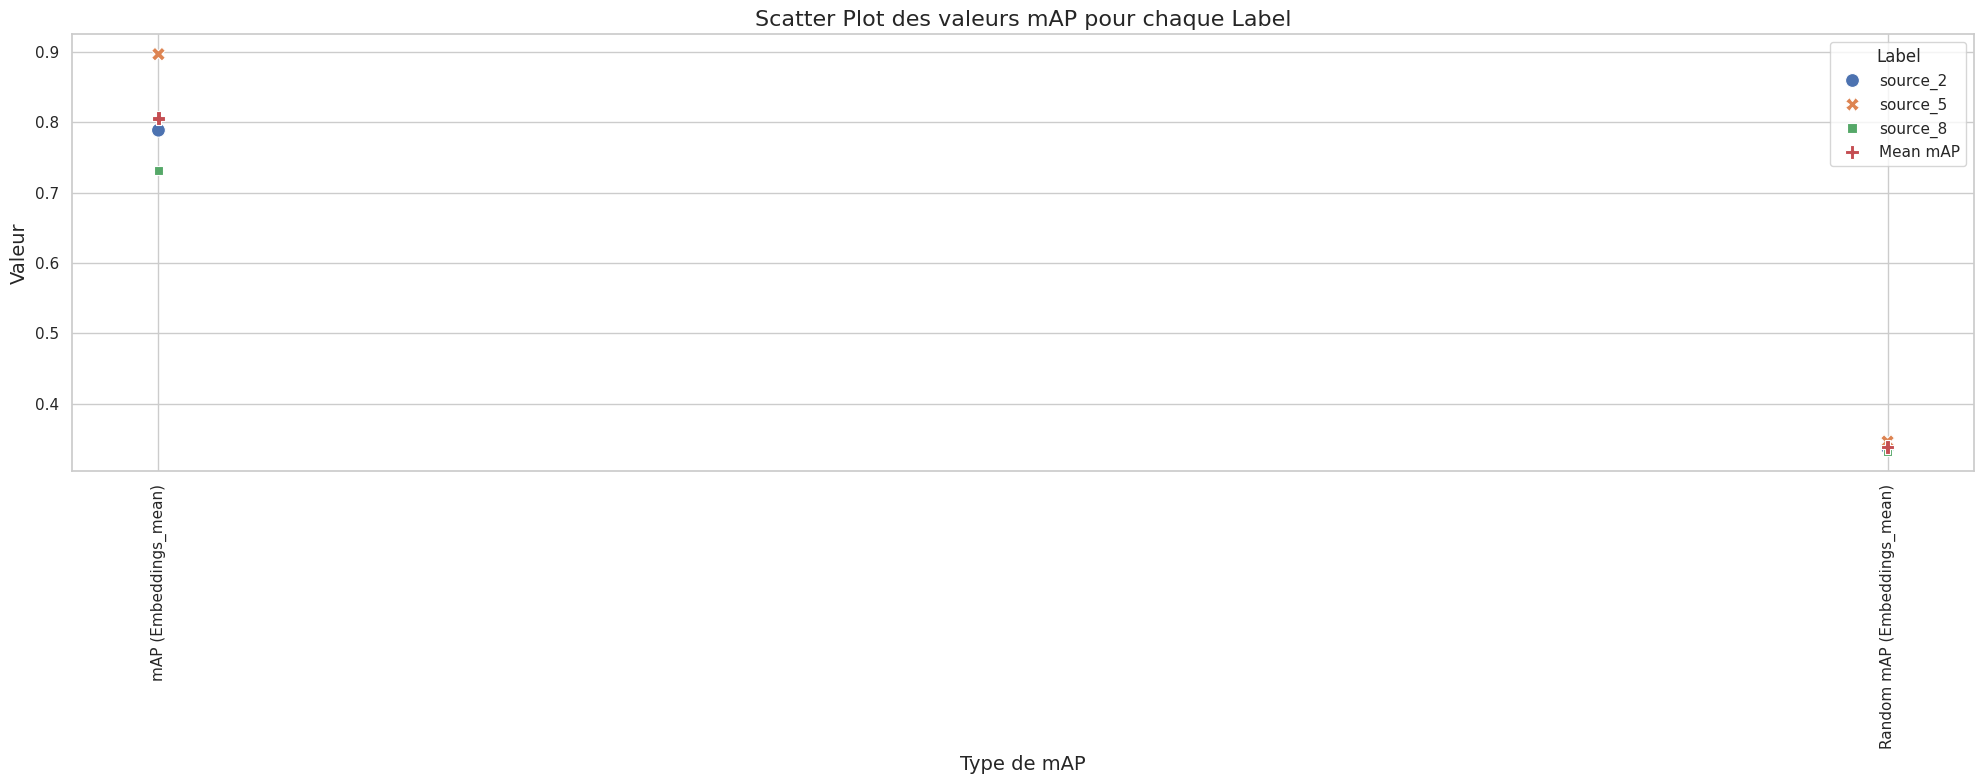

Mean Average Precision (MAP) computed:
      Label  Number of Queries  mAP (Embeddings_mean)  \
0  source_2         383.000000               0.788502   
1  source_5         384.000000               0.896489   
2  source_8         384.000000               0.731241   
3  Mean mAP         383.666667               0.805411   

   Random mAP (Embeddings_mean)  
0                      0.337657  
1                      0.346357  
2                      0.332575  
3                      0.338863  


In [54]:

# 13. Test Compute Maps
maps = em.compute_maps(
    labels_column="Metadata_Source",
    embeddings_names={"Embeddings_mean": "Embeddings_mean"},
    distance="euclidean",
    random_maps=True
)
print("Mean Average Precision (MAP) computed:")
print(maps)
